In [1]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('sea_level_change_ssp585_medium_confidence_reduced_locations.csv')
data.head()

,names,lat,lon,quantiles,years,sea_level_change
0,BREST,48.38,-4.49,0.0,2020,-88.0
1,BREST,48.38,-4.49,0.0,2030,-105.0
2,BREST,48.38,-4.49,0.0,2040,-88.0
3,BREST,48.38,-4.49,0.0,2050,-95.0
4,BREST,48.38,-4.49,0.0,2060,-117.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542940 entries, 0 to 1542939
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   names             1542940 non-null  object 
 1   lat               1542940 non-null  float64
 2   lon               1542940 non-null  float64
 3   quantiles         1542940 non-null  float64
 4   years             1542940 non-null  int64  
 5   sea_level_change  1542940 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 70.6+ MB


In [4]:
data2 = data[data['sea_level_change'] == -32768]
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   names             0 non-null      object 
 1   lat               0 non-null      float64
 2   lon               0 non-null      float64
 3   quantiles         0 non-null      float64
 4   years             0 non-null      int64  
 5   sea_level_change  0 non-null      float64
dtypes: float64(4), int64(1), object(1)
memory usage: 0.0+ bytes


### Using only the median (0.5 quantile)

In [5]:
data = data[data['quantiles'] == 0.5]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14420 entries, 742 to 1542197
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   names             14420 non-null  object 
 1   lat               14420 non-null  float64
 2   lon               14420 non-null  float64
 3   quantiles         14420 non-null  float64
 4   years             14420 non-null  int64  
 5   sea_level_change  14420 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 788.6+ KB


In [6]:
# Unique cities in the total dataset
unique_cities_df = data[['names', 'lat', 'lon']].drop_duplicates(subset=['names'])
unique_cities_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1019 entries, 742 to 1542184
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   names   1019 non-null   object 
 1   lat     1019 non-null   float64
 2   lon     1019 non-null   float64
dtypes: float64(2), object(1)
memory usage: 31.8+ KB


In [7]:
unique_cities_df.to_csv('unique_cities_sea_level_change_ssp585_medium_confidence_reduced_locations.csv', index=False)

In [23]:
# Plotting the unique cities on a world map
fig = px.scatter_geo(unique_cities_df, 
                     lat='lat', 
                     lon='lon',
                     hover_name='names',
                     projection='natural earth')
fig.update_traces(marker=dict(size=5, color='orange'))
fig.update_layout(
    title=dict(
        text=f'{unique_cities_df.shape[0]} Cities on the World Map',
        x=0.5,          # center horizontally
        xanchor='center'
    ),
    height=600
)
fig.write_html(
    "all_cities.html",
    include_plotlyjs=True,
    full_html=True
)
fig.show()

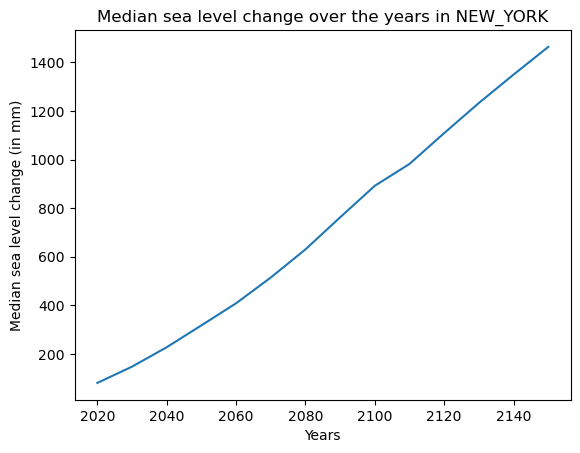

In [9]:
CITY_NAME = "NEW_YORK"
city_data = data[data['names'] == CITY_NAME]
plt.plot(city_data.years, city_data.sea_level_change)
plt.xlabel('Years')
plt.ylabel('Median sea level change (in mm)')
plt.title(f'Median sea level change over the years in {CITY_NAME}')
plt.show()

# EDA for the filtered cities

In [14]:
filtered_data_median=pd.read_csv('final_filtered_median_data.csv')
filtered_data_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   names             1400 non-null   object 
 1   country           1400 non-null   object 
 2   lat               1400 non-null   float64
 3   lon               1400 non-null   float64
 4   years             1400 non-null   int64  
 5   sea_level_change  1400 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 65.8+ KB


In [15]:
# Create a dataframe with unique cities and their coordinates
unique_cities_df = filtered_data_median[['names', 'lat', 'lon']].drop_duplicates(subset=['names'])
unique_cities_df.reset_index(drop=True, inplace=True)
unique_cities_df

,names,lat,lon
0,NEW_YORK,40.70,-74.01
1,BOSTON,42.35,-71.05
2,LOS_ANGELES,33.72,-118.27
3,SAN_FRANCISCO,37.81,-122.47
4,MIAMI_BEACH,25.77,-80.13
...,...,...,...
95,CABO_SAN_LUCAS,22.88,-109.90
96,ENSENADA,31.85,-116.63
97,BUENOS_AIRES,-34.60,-58.37
98,CAPE_TOWN,-33.91,18.43


In [16]:
fig = px.scatter_geo(unique_cities_df, 
                     lat='lat', 
                     lon='lon',
                     hover_name='names',
                     projection='natural earth')
fig.update_traces(marker=dict(size=5, color='orange'))
fig.update_layout(
    title=dict(
        text=f'{unique_cities_df.shape[0]} selected cities on the World Map',
        x=0.5,          # center horizontally
        xanchor='center'
    ),
    height=600
)
fig.write_html(
    "selected_cities.html",
    include_plotlyjs=True,
    full_html=True
)
fig.show()

In [17]:
selected_city = "PALERMO"
lat, long = unique_cities_df[unique_cities_df['names'] == selected_city][['lat', 'lon']].values[0]

fig = px.scatter_geo(unique_cities_df, 
                     lat='lat', 
                     lon='lon',
                     hover_name='names',
                     projection='natural earth')
fig.update_traces(marker=dict(size=5, color='orange'))

# Add selected city
selected_data = unique_cities_df[unique_cities_df['names'] == selected_city]
fig.add_scattergeo(lat=selected_data['lat'], 
                   lon=selected_data['lon'],
                   marker=dict(size=15, color='red', symbol='star'),
                   name=selected_city)
fig.update_layout(title=f'{selected_city} on the World Map', height=600)
fig.show()

In [18]:
filtered_data_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   names             1400 non-null   object 
 1   country           1400 non-null   object 
 2   lat               1400 non-null   float64
 3   lon               1400 non-null   float64
 4   years             1400 non-null   int64  
 5   sea_level_change  1400 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 65.8+ KB


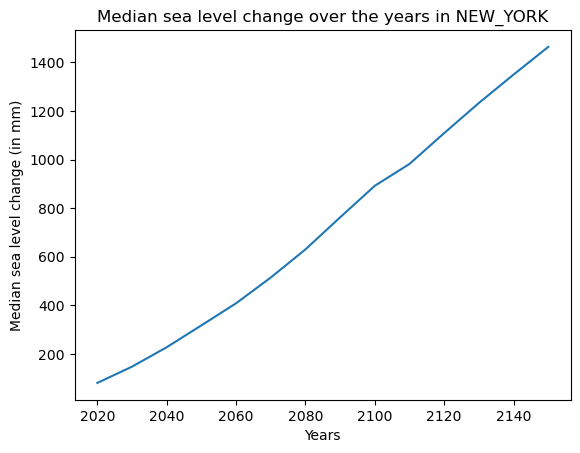

In [19]:
CITY_NAME = "NEW_YORK"
city_data = filtered_data_median[filtered_data_median['names'] == CITY_NAME]
plt.plot(city_data.years, city_data.sea_level_change)
plt.xlabel('Years')
plt.ylabel('Median sea level change (in mm)')
plt.title(f'Median sea level change over the years in {CITY_NAME}')
plt.show()

In [20]:
heatmap_df = filtered_data_median.pivot(
    index="names",
    columns="years",
    values="sea_level_change"
)


In [34]:
latest_year = heatmap_df.columns.max()
heatmap_df = heatmap_df.sort_values(by=latest_year, ascending=False)
fig = px.imshow(
    heatmap_df,
    color_continuous_scale="Turbo",  # great for scientific data
    labels=dict(
        x="Year",
        y="City",
        color="Sea Level Rise (mm)"
    ),
    aspect="auto"
)

fig.update_layout(
    title="Sea Level Rise by City and Year",
    height=1800,
    width=1000
)

fig.show()

In [32]:
fig = px.bar(
    filtered_data_median,
    x="names",
    y="sea_level_change",
    animation_frame="years",
    animation_group="names",
    color="sea_level_change",
    color_continuous_scale="Reds",
    range_y=[0, filtered_data_median["sea_level_change"].max()],
    labels={
        "names": "City",
        "sea_level_change": "Sea Level Rise (mm)"
    }
)

fig.update_layout(
    title="Sea Level Rise by City Over Time",
    xaxis_tickangle=-45,
    height=600,
    width=1800
)

fig.show()

In [44]:
SELECTED_YEAR = 2050
TOP_N = 10

top_df = (
    filtered_data_median[filtered_data_median["years"] == SELECTED_YEAR]
    .sort_values(by="sea_level_change", ascending=False)
    .head(TOP_N)
)

fig = px.bar(
    top_df,
    x="names",
    y="sea_level_change",
    # color="sea_level_change",
    # color_continuous_scale="Reds",
    text="sea_level_change",
    labels={
        "names": "City",
        "sea_level_change": "Sea Level Rise (mm)"
    }
)

fig.update_layout(
    title=f"Top {TOP_N} Cities by Sea Level Rise in {SELECTED_YEAR}",
    xaxis_tickangle=-45,
    height=500
)

fig.update_traces(
    texttemplate="%{text} mm",
    textposition="outside"
)

fig.show()


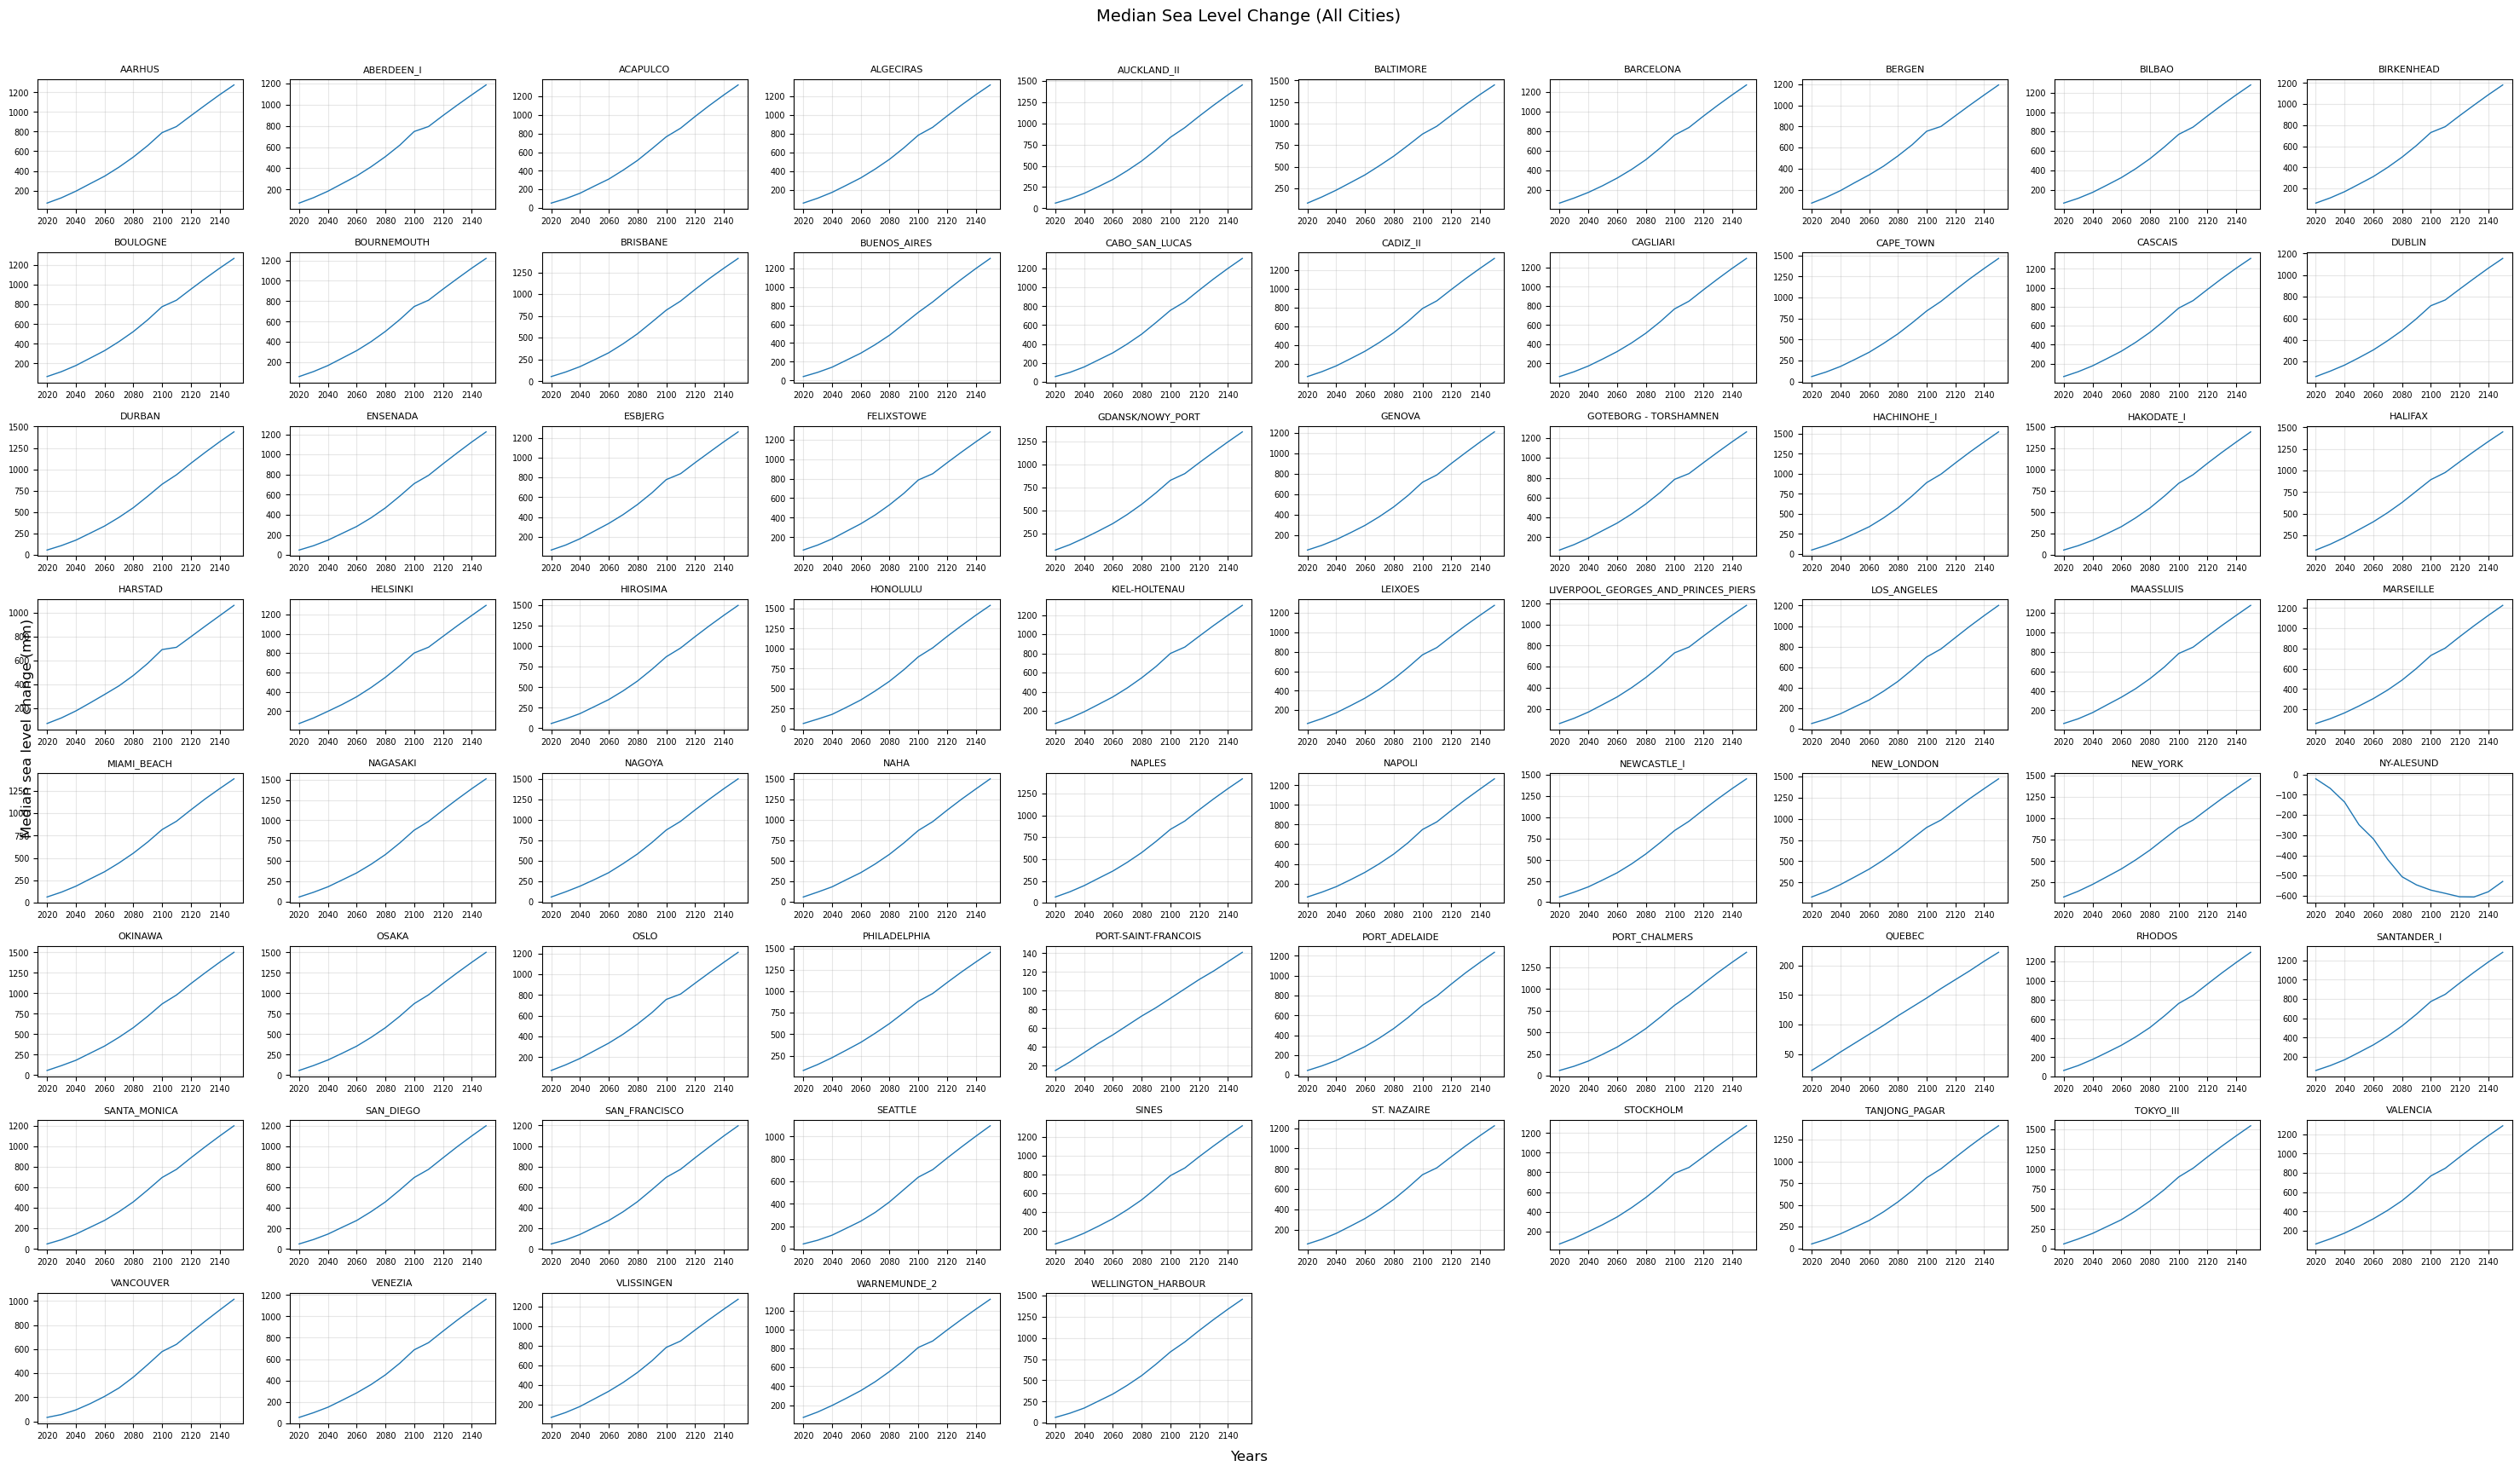

In [ ]:
import math

# Plot median sea level change for all cities as subplots
unique_names = sorted(filtered_data_median['names'].unique())
num_cities = len(unique_names)
cols = 10
rows = math.ceil(num_cities / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 2.2), sharex=False, sharey=False)
axes_flat = axes.ravel()

for ax, name in zip(axes_flat, unique_names):
    city_data = filtered_data_median[filtered_data_median['names'] == name]
    ax.plot(city_data['years'], city_data['sea_level_change'], linewidth=1.0)
    ax.set_title(name, fontsize=8)
    ax.tick_params(labelsize=7)
    ax.grid(True, alpha=0.3)

# Hide any unused subplots
for ax in axes_flat[num_cities:]:
    ax.axis('off')

fig.suptitle('Median Sea Level Change (All selected Cities)', fontsize=14)
fig.supxlabel('Years')
fig.supylabel('Median sea level change (mm)')
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [30]:
unique_cities_df.to_csv('filtered_100_cities_with_coordinates.csv', index=False)